In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast

In [2]:
trump_df = pandas.read_csv('data/all_trump_w_topics.csv')
trump_df['candidate'] = 'trump'
clinton_df = pandas.read_csv('data/all_clinton_w_topics.csv')
clinton_df['candidate'] = 'clinton'
sanders_df = pandas.read_csv('data/all_sanders_w_topics.csv')
sanders_df['candidate'] = 'sanders'
cruz_df = pandas.read_csv('data/all_cruz_w_topics.csv')
cruz_df['candidate'] = 'cruz'
ORGS = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']


In [3]:
n = len(clinton_df) 
clinton_df.index = xrange(len(trump_df), (len(trump_df) + n))
m = len(sanders_df)
sanders_df.index = xrange(max(clinton_df.index), max(clinton_df.index) + m)
c = len(cruz_df)
cruz_df.index = xrange(max(sanders_df.index), max(sanders_df.index) + c)

In [4]:
all_df = pandas.concat([trump_df,clinton_df, sanders_df, cruz_df]) 
all_df['gunning_fog'] = all_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
all_df['flesch'] = all_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
all_df['readability'] = all_df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

# Convert topics to Dict and Filter by > 0.1

In [5]:
all_df['topic_dict'] = all_df['topic'].apply(lambda d: ast.literal_eval(d))
all_df['top_topics'] = all_df['topic_dict'].apply(lambda d: {k:v for k, v in d.iteritems() if v > 0.1})
all_df['topic_list'] = all_df['top_topics'].apply(lambda d: d.keys()) 
all_df['top_topic'] = all_df['topic_dict'].apply(lambda d: max(d, key=lambda i: d[i]))

# Breakdown of Story Topics

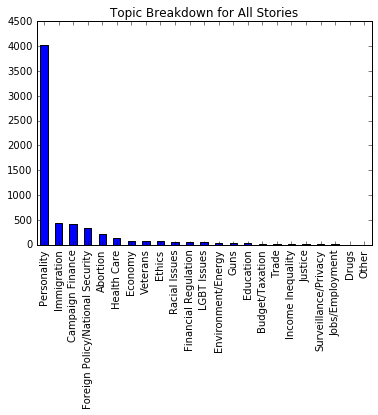

In [6]:
all_df['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for All Stories")
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

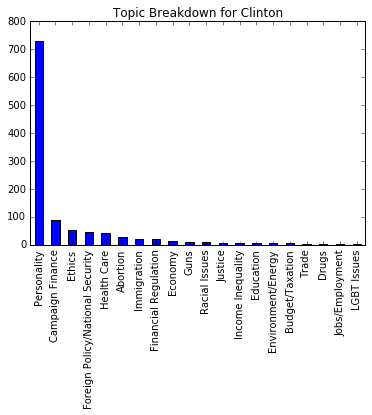

In [7]:
all_df[all_df['candidate'] == 'clinton']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Clinton")

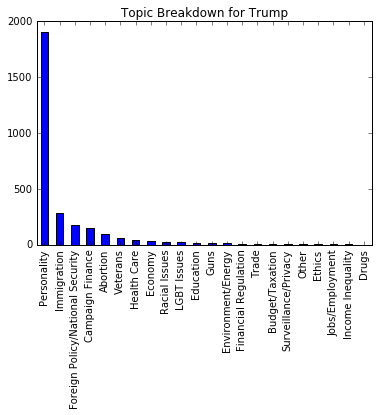

In [8]:
all_df[all_df['candidate'] == 'trump']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Trump")

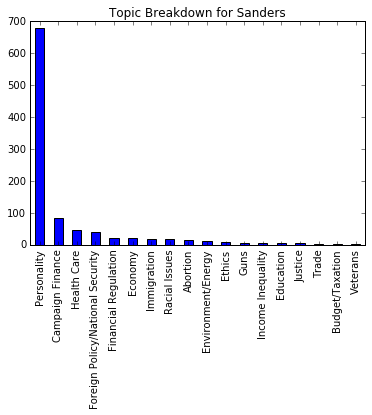

In [9]:
all_df[all_df['candidate'] == 'sanders']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Sanders")

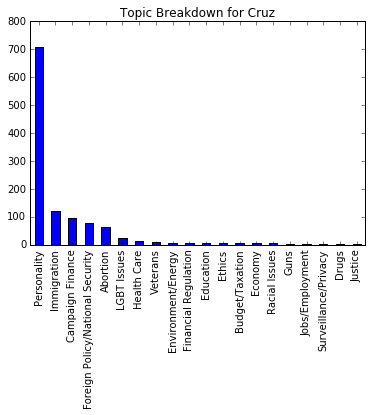

In [10]:
all_df[all_df['candidate'] == 'cruz']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Cruz")

## Reading Level Breakdown by Topic

In [11]:
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

TOPICS = ['Personality', 'Immigration', 'Campaign Finance', 'Foreign Policy/National Security',
         'Abortion', 'Health Care', 'Economy', 'Veterans', 'Ethics', 'Racial Issues']

print "Average Flesch Scores by Topic"
for t in TOPICS:
    df_t = all_df[all_df['top_topic'] == t]
    print t, ":", '%.2f' % df_t['flesch'].mean()

Average Flesch Scores by Topic
Personality : 9.02
Immigration : 9.28
Campaign Finance : 9.01
Foreign Policy/National Security : 9.19
Abortion : 9.08
Health Care : 9.86
Economy : 9.75
Veterans : 9.06
Ethics : 10.90
Racial Issues : 9.93


## Topic Breakdown By Candidate

In [12]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for c in CANDIDATES:
    print c, 'average Flesch score', '%.2f' % all_df[all_df['candidate'] == c]['flesch'].mean()   
    print "\t\t\t\t\t%"
    print 100* all_df[all_df['candidate'] == c]['top_topic'].value_counts(normalize=True)[:5]
    print

clinton average Flesch score 9.55
					%
Personality                         66.453965
Campaign Finance                     8.204193
Ethics                               4.740201
Foreign Policy/National Security     4.193254
Health Care                          3.828624
Name: top_topic, dtype: float64

sanders average Flesch score 9.55
					%
Personality                         68.442211
Campaign Finance                     8.442211
Health Care                          4.623116
Foreign Policy/National Security     4.020101
Financial Regulation                 2.211055
Name: top_topic, dtype: float64

trump average Flesch score 8.94
					%
Personality                         66.110532
Immigration                          9.871394
Foreign Policy/National Security     6.082725
Campaign Finance                     5.318040
Abortion                             3.441084
Name: top_topic, dtype: float64

cruz average Flesch score 8.85
					%
Personality                         61.154177
Immigr

## Average Reading Scores by Candidate per Topic

In [13]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for t in TOPICS: 
    scores = []
    for c in CANDIDATES:
        scores.append((c,all_df[(all_df['candidate'] == c) & (all_df['top_topic'] == t)]['flesch'].mean())) 
    scores.sort(key=lambda x: x[1], reverse=True)
    
    print t
    for s in scores:
        print s[0], '%.2f' % s[1]
    print

Personality
sanders 9.35
clinton 9.30
trump 8.87
cruz 8.79

Immigration
sanders 10.19
clinton 10.09
trump 9.31
cruz 8.91

Campaign Finance
sanders 9.40
clinton 9.34
trump 8.79
cruz 8.73

Foreign Policy/National Security
clinton 10.16
sanders 9.77
trump 8.93
cruz 8.89

Abortion
clinton 10.19
sanders 9.45
cruz 8.90
trump 8.81

Health Care
sanders 10.52
clinton 9.85
cruz 9.55
trump 9.16

Economy
clinton 10.42
sanders 9.98
trump 9.48
cruz 8.50

Veterans
clinton nan
trump 9.08
cruz 9.07
sanders 8.30

Ethics
sanders 11.11
trump 11.10
cruz 10.88
clinton 10.86

Racial Issues
sanders 10.99
clinton 10.76
trump 9.20
cruz 8.66



## Story Distrubtion Per Candidate


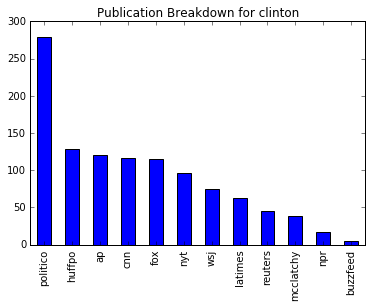

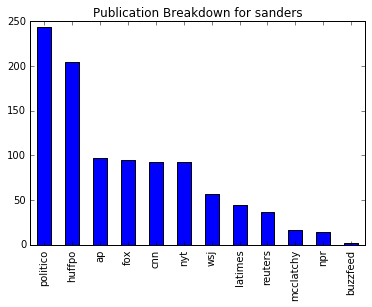

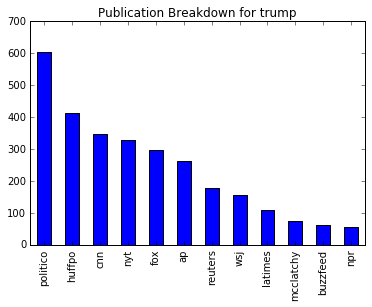

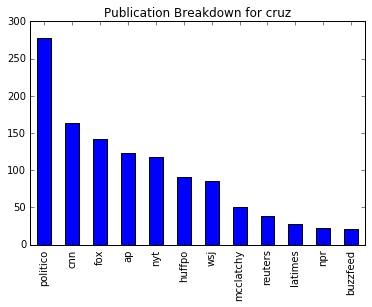

In [14]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
 
for c in CANDIDATES: 
    all_df[all_df['candidate'] == c]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c)
    matplotlib.pyplot.show() 

# Let's look at the polar ends.

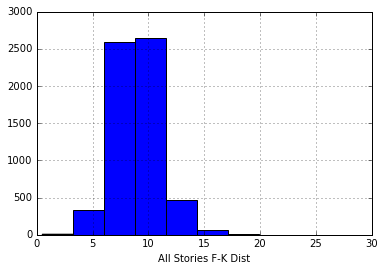

In [41]:
all_df['flesch'].hist().set_xlabel('All Stories F-K Dist')

TOTAL: 6130
OVERALL LESS THAN 6: 222 3.62 %
OVERALL GREATER THAN 12: 391 6.38 %
OVERALL MIDDLE 8-10: 2475 40.38 %



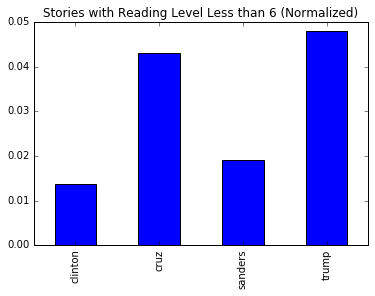

Raw Counts
trump      138
cruz        50
sanders     19
clinton     15
Name: candidate, dtype: int64


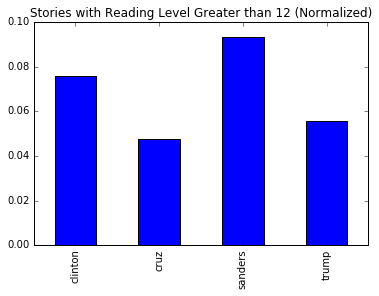

Raw Counts
trump      160
sanders     93
clinton     83
cruz        55
Name: candidate, dtype: int64


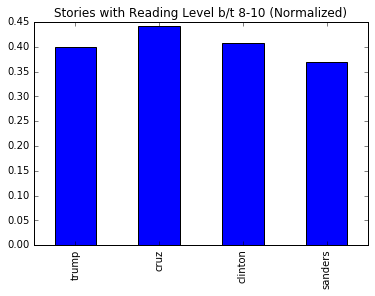

Raw Counts
trump      1147
cruz        513
clinton     447
sanders     368
Name: candidate, dtype: int64


In [99]:
t = len(all_df)
print "TOTAL:", t
low = all_df[all_df['flesch'] < 6]
high = all_df[all_df['flesch'] > 12]
mid = all_df[(all_df['flesch'] > 8) & (all_df['flesch'] < 10)]
print "OVERALL LESS THAN 6:", len(low), '%.2f' % (100* len(low)/(len(all_df) * 1.0)), '%'
print "OVERALL GREATER THAN 12:", len(high), '%.2f' % (100* len(high)/(len(all_df) * 1.0)), '%'
print "OVERALL MIDDLE 8-10:", len(mid), '%.2f' % (100* len(mid)/(len(all_df) * 1.0)), '%'
print
# Not normalized
#low['candidate'].value_counts().plot(kind="bar", title="Stories with Reading Level Less than 5")
#matplotlib.pyplot.show() 
#high['candidate'].value_counts().plot(kind="bar", title="Stories with Reading Level Greater than 15")
#matplotlib.pyplot.show() 

# Normalize
  
(low['candidate'].value_counts() / all_df['candidate'].value_counts()).plot(kind="bar", title="Stories with Reading Level Less than 6 (Normalized)")
matplotlib.pyplot.show()
print 'Raw Counts'
print low['candidate'].value_counts() 

(high['candidate'].value_counts() / all_df['candidate'].value_counts()).plot(kind="bar", title="Stories with Reading Level Greater than 12 (Normalized)")
matplotlib.pyplot.show()
print 'Raw Counts'
print high['candidate'].value_counts() 
 
(mid['candidate'].value_counts() / all_df['candidate'].value_counts()).plot(kind="bar", title="Stories with Reading Level b/t 8-10 (Normalized)")
matplotlib.pyplot.show()
print 'Raw Counts'
print mid['candidate'].value_counts() 

#    all_df[all_df['candidate'] == c]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c)
#    matplotlib.pyplot.show() 


## Remove Personality (Other) Category

TOTAL: 6130
OVERALL LESS THAN 6: 86 1.40 %
OVERALL GREATER THAN 12: 190 3.10 %
OVERALL MIDDLE 8-10: 775 12.64 %



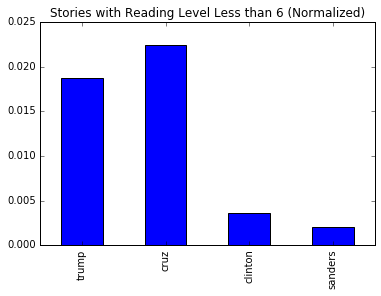

Raw Counts
trump      54
cruz       26
clinton     4
sanders     2
Name: candidate, dtype: int64


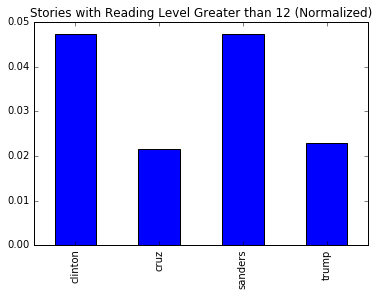

Raw Counts
trump      66
clinton    52
sanders    47
cruz       25
Name: candidate, dtype: int64


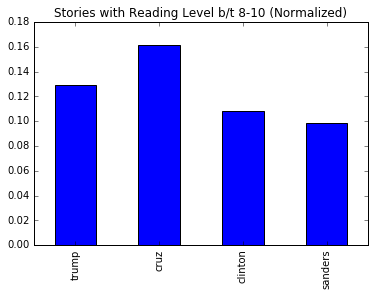

Raw Counts
trump      371
cruz       187
clinton    119
sanders     98
Name: candidate, dtype: int64


In [111]:
t = len(all_df)
print "TOTAL:", t
low_nop = all_df[(all_df['flesch'] < 6) & (all_df['top_topic'] != "Personality")]
high_nop = all_df[(all_df['flesch'] > 12) & (all_df['top_topic'] != "Personality")]
mid_nop = all_df[(all_df['flesch'] > 8) & (all_df['flesch'] < 10) & (all_df['top_topic'] != "Personality")]
print "OVERALL LESS THAN 6:", len(low_nop), '%.2f' % (100* len(low_nop)/(len(all_df) * 1.0)), '%'
print "OVERALL GREATER THAN 12:", len(high_nop), '%.2f' % (100* len(high_nop)/(len(all_df) * 1.0)), '%'
print "OVERALL MIDDLE 8-10:", len(mid_nop), '%.2f' % (100* len(mid_nop)/(len(all_df) * 1.0)), '%'
print
# Not normalized
#low['candidate'].value_counts().plot(kind="bar", title="Stories with Reading Level Less than 5")
#matplotlib.pyplot.show() 
#high['candidate'].value_counts().plot(kind="bar", title="Stories with Reading Level Greater than 15")
#matplotlib.pyplot.show() 

# Normalize
  
(low_nop['candidate'].value_counts() / all_df['candidate'].value_counts()).plot(kind="bar", title="Stories with Reading Level Less than 6 (Normalized)")
matplotlib.pyplot.show()
print 'Raw Counts'
print low_nop['candidate'].value_counts() 

(high_nop['candidate'].value_counts() / all_df['candidate'].value_counts()).plot(kind="bar", title="Stories with Reading Level Greater than 12 (Normalized)")
matplotlib.pyplot.show()
print 'Raw Counts'
print high_nop['candidate'].value_counts() 
 
(mid_nop['candidate'].value_counts() / all_df['candidate'].value_counts()).plot(kind="bar", title="Stories with Reading Level b/t 8-10 (Normalized)")
matplotlib.pyplot.show()
print 'Raw Counts'
print mid_nop['candidate'].value_counts() 

#    all_df[all_df['candidate'] == c]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c)
#    matplotlib.pyplot.show() 


## Topic breakdown for above

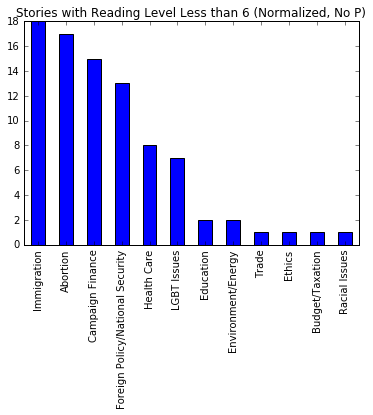

LOW READING LEVEL < 6


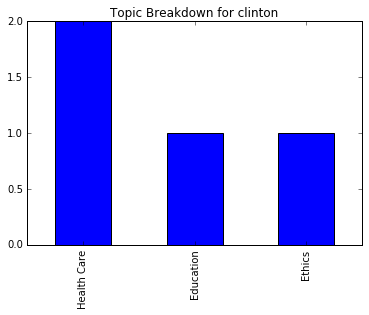

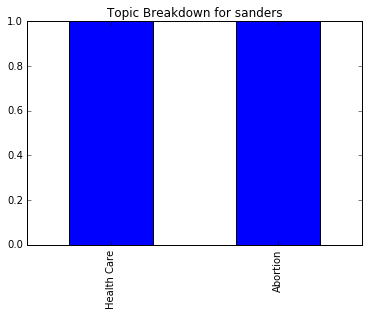

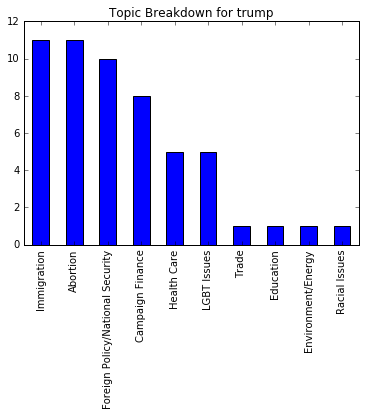

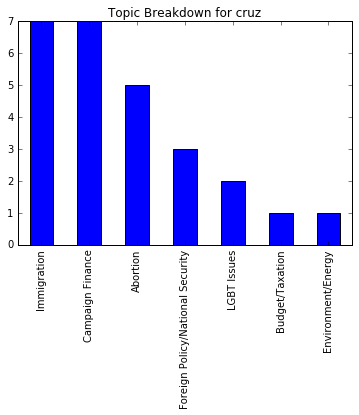

HIGH READING LEVEL > 12


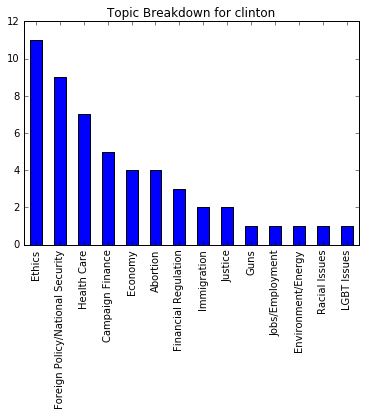

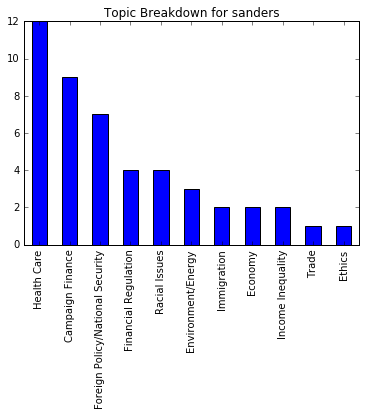

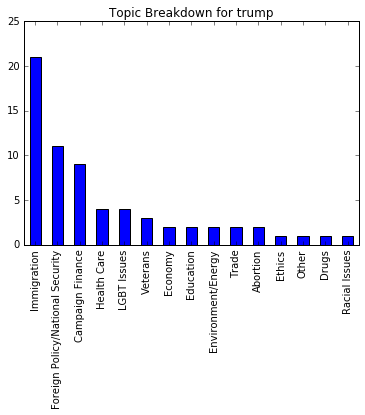

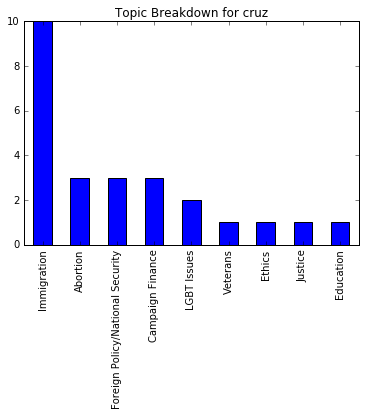

MID READING LEVEL 8-10


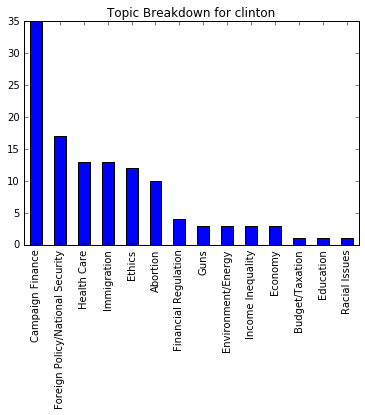

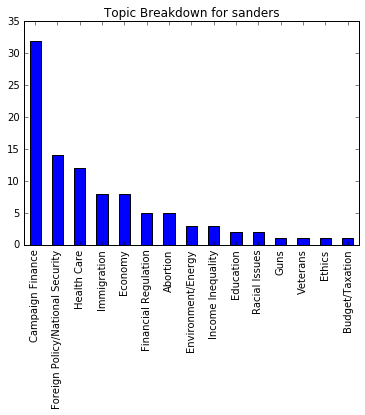

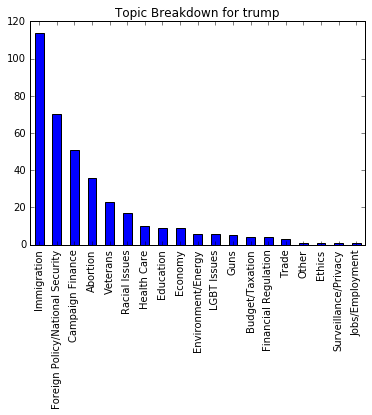

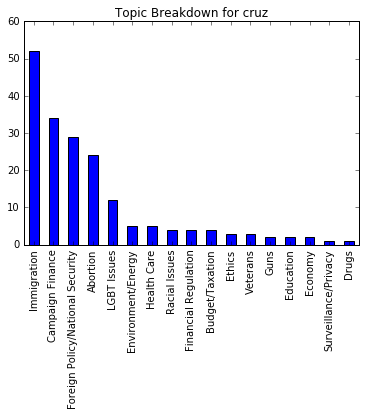

In [115]:
low_nop['top_topic'].value_counts().plot(kind="bar", title="Stories with Reading Level Less than 6 (Normalized, No P)")
matplotlib.pyplot.show() 

print "LOW READING LEVEL < 6"
for c in CANDIDATES: 
    low_nop[low_nop['candidate'] == c]['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for " + c)
    matplotlib.pyplot.show() 
    

print "HIGH READING LEVEL > 12"
for c in CANDIDATES: 
    high_nop[high_nop['candidate'] == c]['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for " + c)
    matplotlib.pyplot.show() 


print "MID READING LEVEL 8-10"
for c in CANDIDATES: 
    mid_nop[mid_nop['candidate'] == c]['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for " + c)
    matplotlib.pyplot.show() 
 

# For the above, what is the quote ratio?
# fill this in.

In [15]:
import re

In [33]:
def get_quoted_text(text):
    return re.findall(r'[\“|\"](.+)[\"|\”]', text)
def get_quoted_text_author_1(text):
    return re.findall(r'[\“|\"](.+)[\”|\"] (\w+) said.+\.', text)
def get_quoted_text_author_2(text):
    return re.findall(r'[\“|\"](.+)[\”|\"] said (\w+ \w+).+\.', text) 


In [38]:
t = all_df['body'][0]
print t
print get_quoted_text(t)


Fox Business Network
's Republican primary debate was watched by an average of 11 million viewers on Thursday, the smallest audience of the six 
GOP
 candidate showdowns held so far.
The figure from Nielsen is down 2.5 million viewers from the first FBN debate on Nov. 10, which pulled a record high 13.5 million viewers for the cable network. It's less than half of the largest debate audience of the 2016 presidential campaign when the Republicans' first meeting pulled in 24 million viewers for 
Fox News Channel
 on Aug. 6 and significantly below the last GOP debate on CNN, which had 18 million viewers on Dec. 15.
See the most-read stories in Entertainment this hour >>
FBN's audience was still substantial compared to previous primary seasons. The largest audience for a Republican primary debate in the 2012 cycle was 7.6 million.
The large audiences for the 2016-primary debates have been attributed to the presence of front-runner 
Donald Trump
, whose celebrity status has drawn viewers wh